In [38]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# imporing datasets
df = pd.read_csv("googleplaystore.csv")

In [40]:
# head of df
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [41]:
# inofrmation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [42]:
# describing dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [43]:
#checking for null value
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [44]:
# filling null value by its mean
mean = df["Rating"].mean()
df["Rating"] = df["Rating"].fillna(mean)

In [45]:
# again checking null value
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [46]:
# droping null value
df = df.dropna()

In [47]:
# converting M to million
df["Reviews"] = df["Reviews"].replace("M","").astype(int)

In [48]:
df["Reviews"] =  df["Reviews"]*10000

In [49]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,1590000,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,9670000,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [50]:
#changing type of indtallation
df["Installs"] = df["Installs"].str.replace("+","")
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df["Installs"].astype(int)

In [51]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,1590000,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,9670000,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


# 1-average installation by category
# 2-max installation by category
# 3-min installation by category

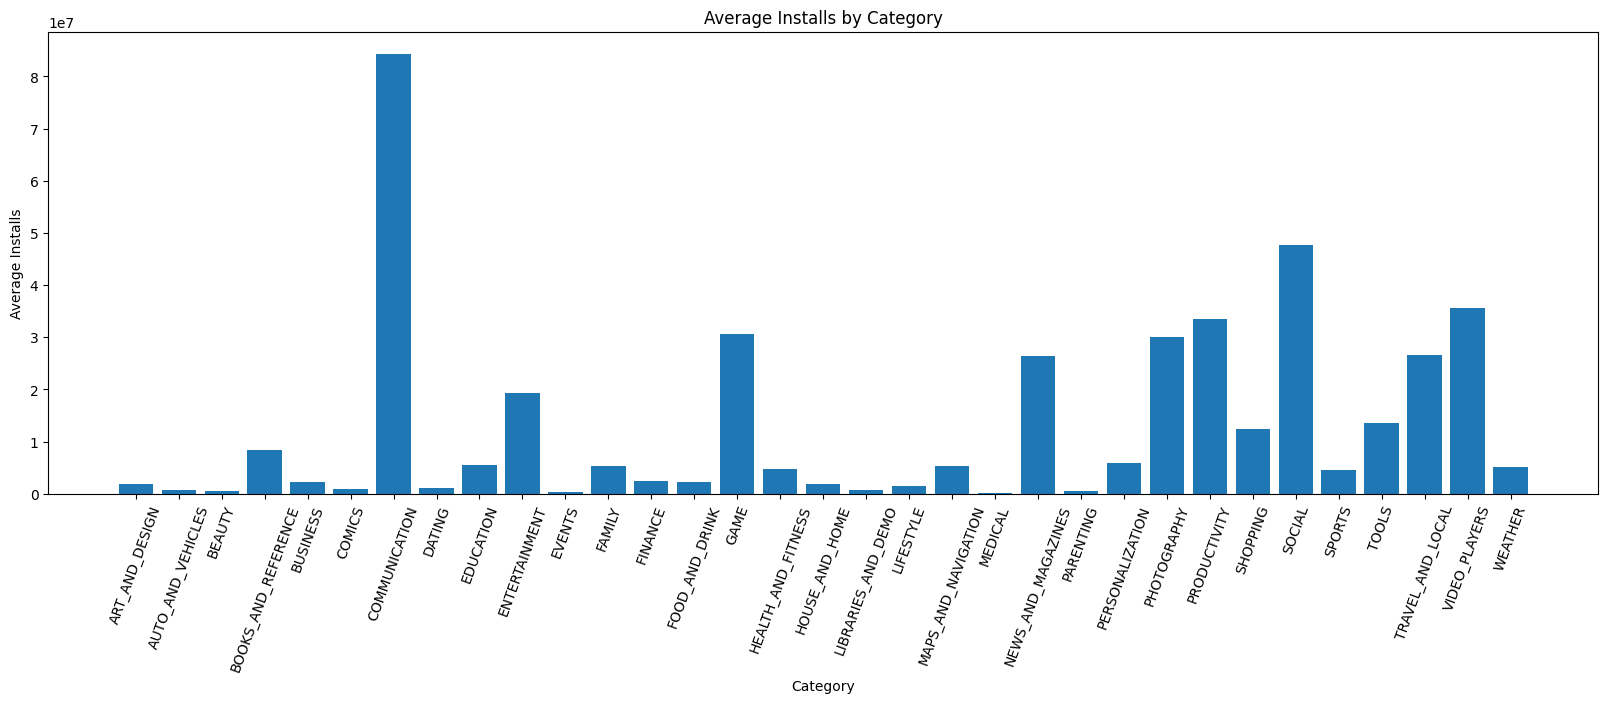

In [52]:
#  1-average installation by category
average_installs_by_category = df.groupby('Category')["Installs"].mean()

plt.figure(figsize =(20,6))
plt.xticks(rotation =70)
plt.bar(average_installs_by_category.index,average_installs_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.title('Average Installs by Category')
plt.show()

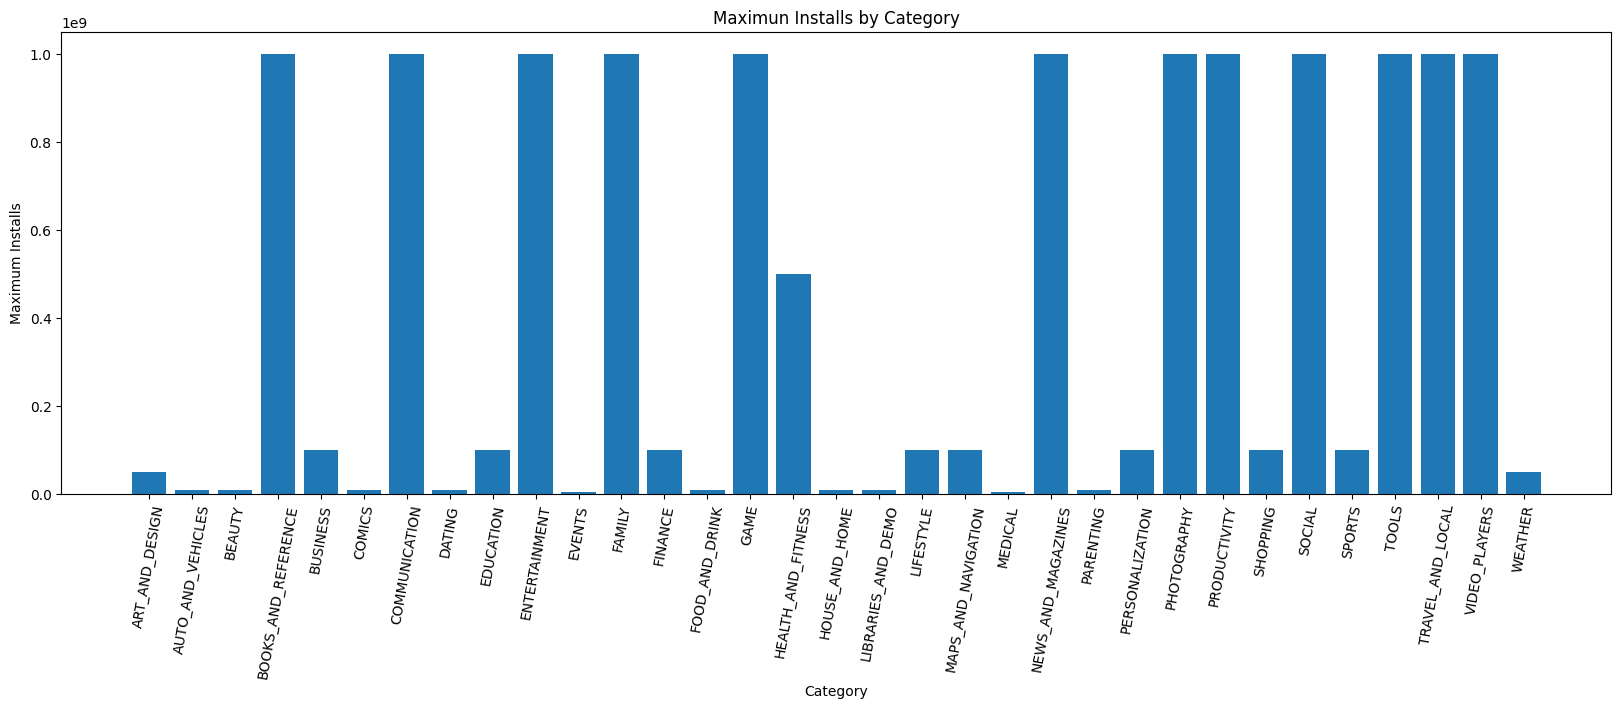

In [53]:
#  2-max installation by category
max_installs_by_category = df.groupby('Category')["Installs"].max()

plt.figure(figsize =(20,6))
plt.xticks(rotation =80)
plt.bar(max_installs_by_category.index,max_installs_by_category.values)
plt.xlabel('Category')
plt.ylabel('Maximum Installs')
plt.title('Maximun Installs by Category')
plt.show()


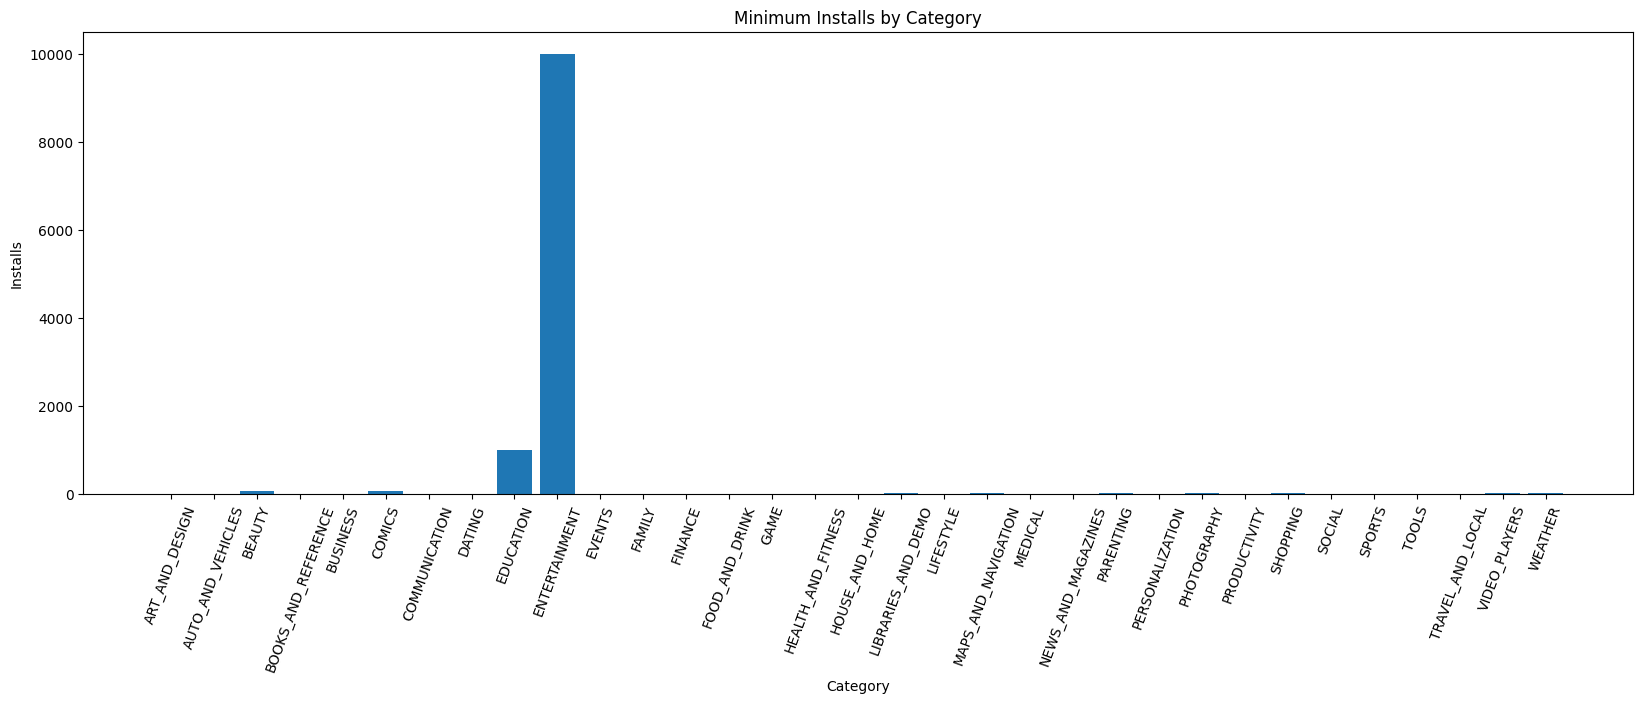

In [54]:
#  2-min installation by category
min_installs_by_category = df.groupby('Category')["Installs"].min()

plt.figure(figsize =(20,6))
plt.xticks(rotation =70)
plt.bar(min_installs_by_category.index,min_installs_by_category.values)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Minimum Installs by Category')
plt.show()
max_category_index = df['Installs'].idxmax()


# maximum value of category

In [55]:
# Find the index (category) of the maximum value in the 'Installs' column
max_category_index = df['Installs'].idxmax()

# Get the maximum value
max_value = df.loc[max_category_index, 'Installs']

# Get the corresponding category
max_category = df.loc[max_category_index, 'Category']

print("Maximum value:", max_value)
print("Category with maximum value:", max_category)

Maximum value: 1000000000
Category with maximum value: BOOKS_AND_REFERENCE


# minimum value of category

In [56]:
# Find the index (category) of the minimum value in the 'Installs' column
min_category_index = df['Installs'].idxmin()

# Get the minimum value
min_value = df.loc[max_category_index, 'Installs']

# Get the corresponding category
min_category = df.loc[min_category_index, 'Category']

print("Maximum value:", min_value)
print("Category with maximum value:", min_category)

Maximum value: 1000000000
Category with maximum value: PERSONALIZATION


# average,max,min rating by category

Maximum review: 1000000000
Category with maximum review: PERSONALIZATION


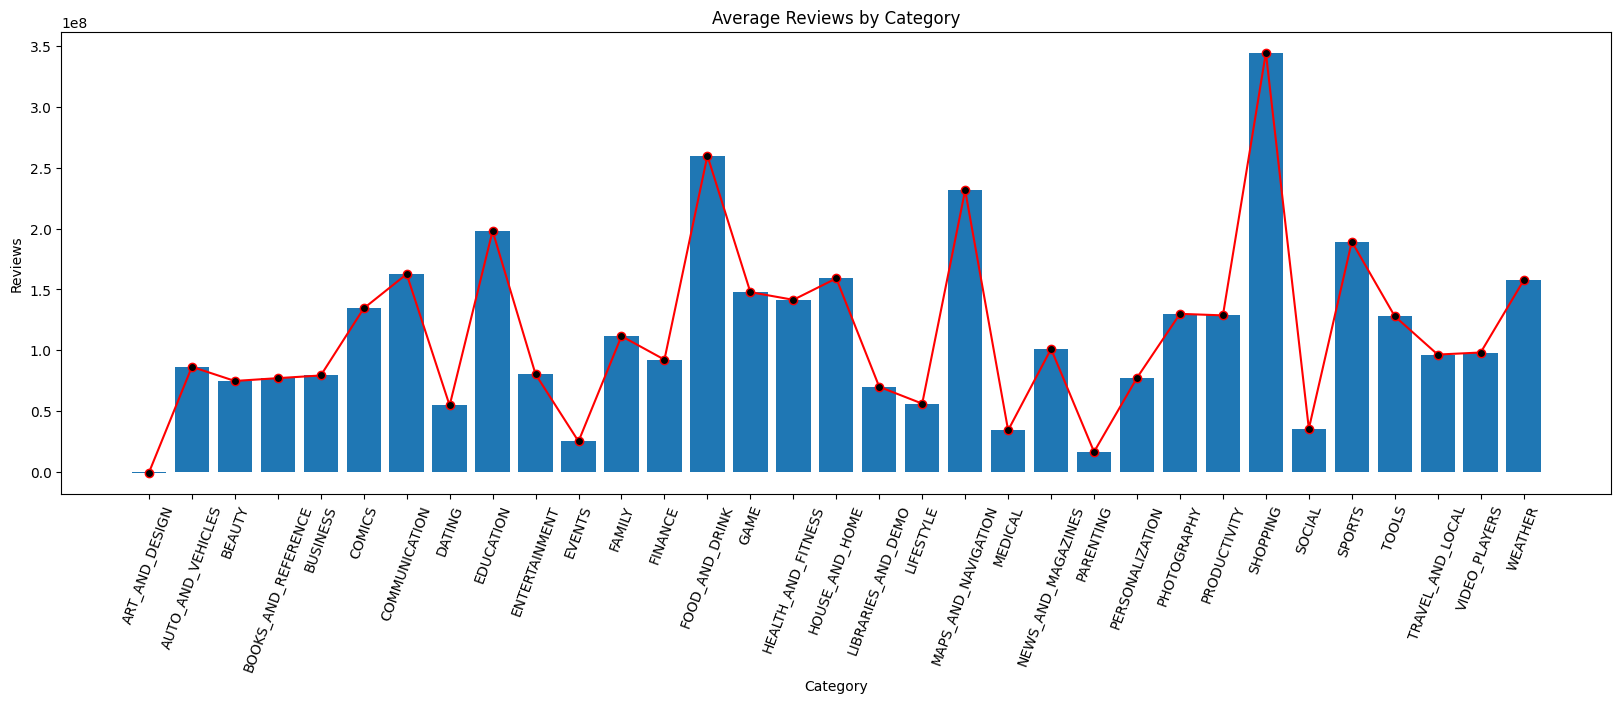

In [57]:
# 1-average review by category
average_reviev_by_category = df.groupby('Category')["Reviews"].mean()

#Find the index (category) of the maximum value in the 'Reviews' column
max_category_index = df['Reviews'].idxmax()

# Get the minimum value
max_value = df.loc[max_category_index, 'Reviews']

# Get the corresponding category
max_category = df.loc[min_category_index, 'Category']

print("Maximum review:", min_value)
print("Category with maximum review:", min_category)



plt.figure(figsize =(20,6))
plt.xticks(rotation =70)
plt.bar(average_reviev_by_category.index,average_reviev_by_category.values,)
plt.plot(average_reviev_by_category.index,average_reviev_by_category.values,color = "red",marker="o",markerfacecolor="black")

plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Average Reviews by Category')
plt.show()


Maximum review: 1000000000
Category with maximum review: PERSONALIZATION


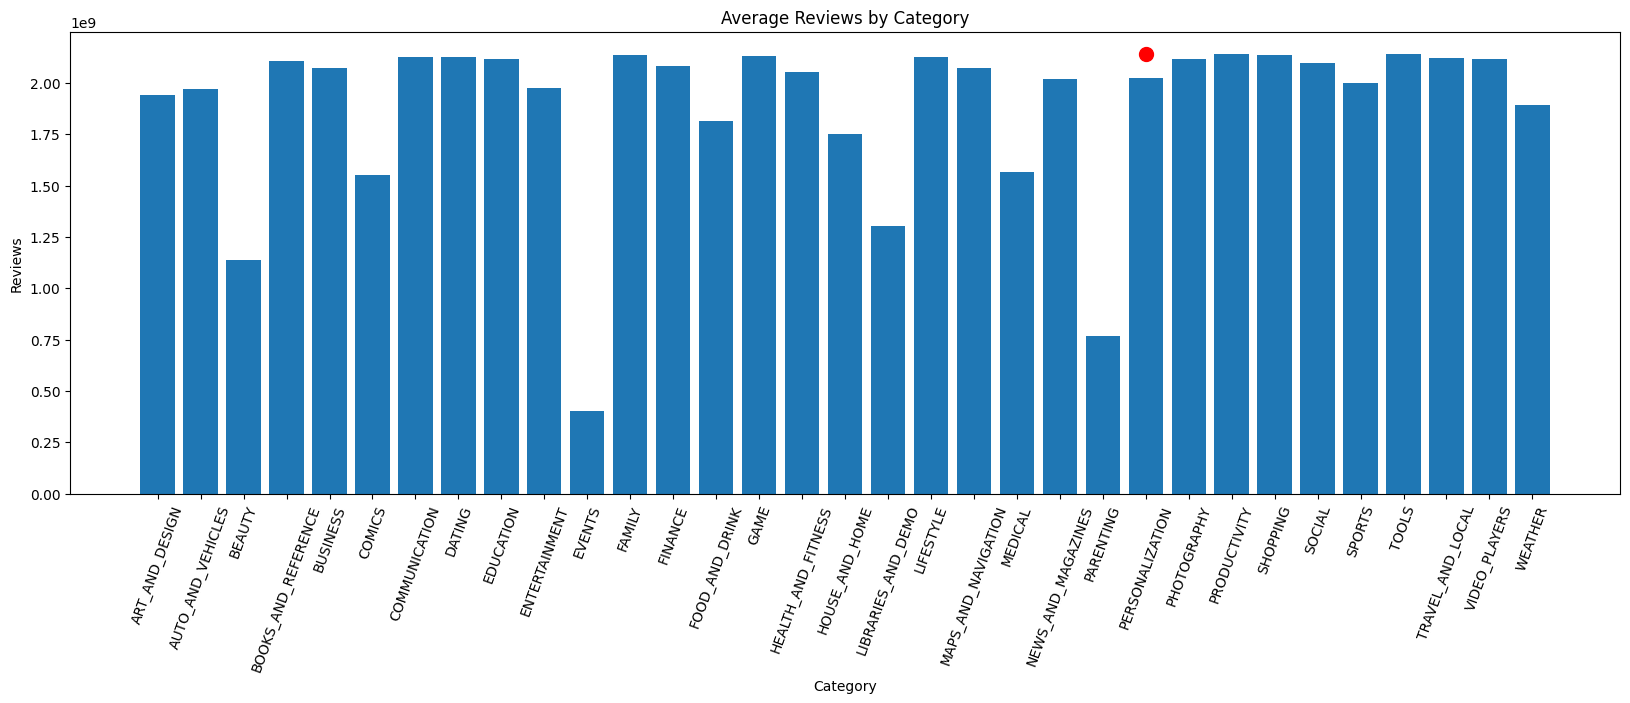

In [58]:
# 1-max review by category
average_reviev_by_category = df.groupby('Category')["Reviews"].max()

# Find the index (category) of the maximum value in the 'Reviews' column
max_category_index = df['Reviews'].idxmax()

# Get the minimum value
max_value = df.loc[max_category_index, 'Reviews']

# Get the corresponding category
max_category = df.loc[min_category_index, 'Category']

print("Maximum review:", min_value)
print("Category with maximum review:", min_category)

plt.figure(figsize =(20,6))
plt.xticks(rotation =70)
plt.bar(average_reviev_by_category.index,average_reviev_by_category.values,)
plt.plot(max_category, max_value, marker='o', markersize=10, color='red', label='Maximum Value')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Average Reviews by Category')
plt.show()




In [59]:
# 1-average review by category
average_reviev_by_category = df.groupby('Category')["Reviews"].min()

# Find the index (category) of the maximum value in the 'Reviews' column
max_category_index = df['Reviews'].idxmax()

# Get the minimum value
max_value = df.loc[max_category_index, 'Reviews']

# Get the corresponding category
max_category = df.loc[min_category_index, 'Category']

print("Maximum review:", min_value)
print("Category with maximum review:", min_category)






Maximum review: 1000000000
Category with maximum review: PERSONALIZATION


# correlation between installation and reviews

In [60]:
correlation = df["Installs"].corr(df["Rating"])
print(f"Correlation between Install and rating= {correlation}")

Correlation between Install and rating= 0.05112607608423249


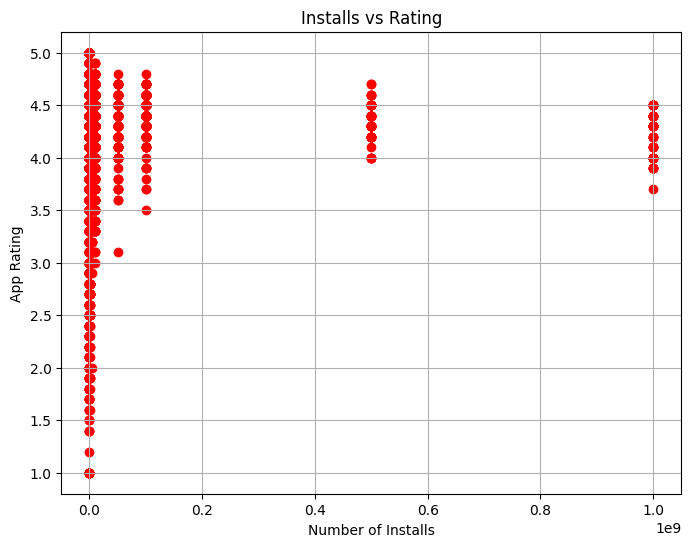

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Installs'], df['Rating'],color='red')
plt.title("Installs vs Rating")
plt.xlabel("Number of Installs")
plt.ylabel("App Rating")
plt.grid(True)

plt.show()


In [62]:
correlation = df["Installs"].corr(df["Reviews"])
print(f"Correlation between Install and reviews= {correlation}")

Correlation between Install and reviews= -0.0069046315904728395


# task 2

## 1-reading data from github

In [78]:
# Correct URL of the raw TSV file
url = "https://raw.githubusercontent.com/MuhammadYaseenKhan/Urdu-Sentiment-Corpus/master/urdu-sentiment-corpus-v1.tsv"

# Read the TSV data using the correct separator and encoding
data = pd.read_csv(url, sep="\t", encoding='utf-8')

# Display the first few rows of the DataFrame
data.head(2)





,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N


In [64]:
# saving data csv
data.to_csv("sentement.csv")

In [79]:
# reading data from csv
data = pd.read_csv("sentement.csv")
data.head(2)

,Unnamed: 0,Tweet,Class
0,0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N


In [66]:
# checing shape
df.shape

(10829, 13)

In [67]:
# checking for null values in
data.isnull().sum()

Unnamed: 0    0
Tweet         0
Class         1
dtype: int64

In [68]:
# droping null value
data = data.dropna()

In [69]:
data = data.drop(columns=["Unnamed: 0"])

In [80]:
data.head(2)

,Unnamed: 0,Tweet,Class
0,0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N


## importing libraries

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

## loading and pre processing

In [72]:
# Load your dataset
# Replace 'filename.csv' with your actual file name

# Preprocess the text (tokenization, lowercase)
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['Tweet'])
sequences = tokenizer.texts_to_sequences(data['Tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['Class'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


## building model

In [73]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes for sentiment
])


## Compile and Train the Model:

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
25/25 [==============================] - 9s 157ms/step - loss: 0.9470 - accuracy: 0.4681 - val_loss: 0.7745 - val_accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 3s 110ms/step - loss: 0.8068 - accuracy: 0.5181 - val_loss: 0.7732 - val_accuracy: 0.4700
Epoch 3/10
25/25 [==============================] - 3s 112ms/step - loss: 0.8110 - accuracy: 0.5106 - val_loss: 0.7759 - val_accuracy: 0.5150
Epoch 4/10
25/25 [==============================] - 3s 108ms/step - loss: 0.7748 - accuracy: 0.5544 - val_loss: 0.7503 - val_accuracy: 0.5250
Epoch 5/10
25/25 [==============================] - 3s 107ms/step - loss: 0.5709 - accuracy: 0.7872 - val_loss: 0.7346 - val_accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 3s 136ms/step - loss: 0.1951 - accuracy: 0.9487 - val_loss: 1.1533 - val_accuracy: 0.6200
Epoch 7/10
25/25 [==============================] - 3s 126ms/step - loss: 0.1026 - accuracy: 0.9712 - val_loss: 1.2789 - val_accuracy: 0.6350
Epoch 

## Evaluate the Model:

In [75]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

7/7 [==============================] - 0s 34ms/step - loss: 1.5774 - accuracy: 0.6400
Loss: 1.5774, Accuracy: 0.6400


In [77]:
# Replace 'new_text' with your new Urdu text
new_text = ["محبت کرنے والوں کے لئے کوئی دن خاص نہیں ہوتا، ہر دن محبت کا موقع ہوتا ہے"]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=100, truncating='post')
predictions = model.predict(new_padded_sequences)
predicted_class = np.argmax(predictions[0])
sentiment = label_encoder.inverse_transform([predicted_class])[0]
print(f'Predicted sentiment: {sentiment}')


1/1 [==============================] - 0s 59ms/step
Predicted sentiment: N
